# Exercise 3. Basic Introduction to Probability

## Part 2. Real-World Probability (Science Garden)

### Task 1. Loading real data.

First, let's load a dataset of daily observations from Science Garden covering the years 2009 to 2024. Each row represents weather data for a single day.

In [1]:
import pandas as pd

# Load the dataset
file_path = '../../data/2009-2024_SCIENCE_GARDEN.csv'
df = pd.read_csv(file_path)

# Quick preview
df.head()

,station_id,station_name,date,year,MAX_C,MIN_C,TEMP_C,DEWP_C,PRCP_mm,WDSP_ms,SLP
0,98430099999,SCIENCE GARDEN,2009-01-01,2009,26.722221,21.777779,24.888890,21.222221,8.128,0.874555,1011.4
1,98430099999,SCIENCE GARDEN,2009-01-02,2009,27.000000,20.388890,23.222221,17.388890,1.778,1.234666,1013.6
2,98430099999,SCIENCE GARDEN,2009-01-03,2009,27.277779,18.222221,22.277779,18.000000,0.000,0.514444,1013.2
3,98430099999,SCIENCE GARDEN,2009-01-04,2009,29.111110,18.222221,22.888890,18.222221,0.000,0.411555,1012.1
4,98430099999,SCIENCE GARDEN,2009-01-05,2009,30.388890,19.222221,24.833334,19.944445,0.000,0.720222,1011.0


In [2]:
df.tail()

,station_id,station_name,date,year,MAX_C,MIN_C,TEMP_C,DEWP_C,PRCP_mm,WDSP_ms,SLP
5794,98430099999,SCIENCE GARDEN,2024-12-27,2024,32.000000,24.388890,27.333334,23.166666,0.000,0.617333,1012.9
5795,98430099999,SCIENCE GARDEN,2024-12-28,2024,30.000000,23.777779,26.055555,23.055555,6.858,0.874555,1012.5
5796,98430099999,SCIENCE GARDEN,2024-12-29,2024,29.277779,23.388890,26.111110,22.888890,10.922,1.646221,1012.0
5797,98430099999,SCIENCE GARDEN,2024-12-30,2024,28.888890,23.611110,26.555555,24.722221,9.652,0.977444,1012.5
5798,98430099999,SCIENCE GARDEN,2024-12-31,2024,31.611110,24.222221,27.722221,24.277779,3.048,0.874555,1010.8


In [3]:
print("Shape of the dataframe:" )
print(df.shape)
print("Columns of the dataframe:")
print(df.columns)
print("Information on the dataframe:")
print(df.info())
print("Description of the dataframe:")
print(df.describe())

nan_counts_per_column = df.isna().sum()
print(f"Number of NaN elements {nan_counts_per_column}")

Shape of the dataframe:
(5799, 11)
Columns of the dataframe:
Index(['station_id', 'station_name', 'date', 'year', 'MAX_C', 'MIN_C',
       'TEMP_C', 'DEWP_C', 'PRCP_mm', 'WDSP_ms', 'SLP'],
      dtype='object')
Information on the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5799 entries, 0 to 5798
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    5799 non-null   int64  
 1   station_name  5799 non-null   object 
 2   date          5799 non-null   object 
 3   year          5799 non-null   int64  
 4   MAX_C         5799 non-null   float64
 5   MIN_C         5799 non-null   float64
 6   TEMP_C        5799 non-null   float64
 7   DEWP_C        5435 non-null   float64
 8   PRCP_mm       5737 non-null   float64
 9   WDSP_ms       5201 non-null   float64
 10  SLP           5433 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 498.5+ KB
None
Description of the dataf

#### Questions for Task 1
1. How many rows are in the dataset? What does each row represent? <br>
**There are 5799 rows in the dataset, with one row corresponding to a singular recording at a certain time and date.**
2. How many columns? What kinds of variables are present?<br>
**There are 11 columns in the dataset, with each row representing atmospheric variables and where it is being recorded.**
3. Are there any missing values?<br>
**There are missing (NaN) values in dewpoint, precipetation, windspeed, and SLP measurements. However, apart from NaN values, there could also be flags that indicate missing measurements.**
4. What are the earliest and latest years in the data?<br>
**The earliest and latest recordings are on 2009-01-01 and 2024-12-31 respectively.**

#### Some helpful commands

```python
# Show first few rows
df.head()

# Get the number of rows and columns
df.shape

# List all column names
df.columns

# Summary of each column
df.info()

# Quick stats (mean, min, max, etc.) for numeric columns
df.describe()
```

---

### Task 2a. Defining Rainy Days

Let’s define a rainy day as any day where `PRCP_mm > 0`. We'll create a new column called `is_rainy` that stores a `1` for rainy days, and `0` for dry days.

This binary classification allows us to treat rain as a simple yes/no event, perfect for computing basic probabilities.

In [4]:
# Define rainy days (1 if PRCP_mm > 0, else 0)
df['is_rainy'] = (df['PRCP_mm'] > 0).astype(int)

# Check
df[['date', 'PRCP_mm', 'is_rainy']].head(10)

,date,PRCP_mm,is_rainy
0,2009-01-01,8.128,1
1,2009-01-02,1.778,1
2,2009-01-03,0.000,0
3,2009-01-04,0.000,0
4,2009-01-05,0.000,0
5,2009-01-06,0.000,0
6,2009-01-07,1.270,1
7,2009-01-08,4.572,1
8,2009-01-09,12.954,1
9,2009-01-10,0.000,0


### Task 2b. Comparing Rainy Day Probabilities for single years.

Now that we’ve defined what counts as a rainy day, we can start computing probabilities.

Let's calculate:
- Probability of a rainy day in 2009
- Probability of a rainy day in 2010

This is simply the proportion of days with `is_rainy == 1` in each year.

In [5]:
# Subset the data for each year
df_2009 = df[df['year'] == 2009]
df_2010 = df[df['year'] == 2010]

# Calculate the probability of a rainy day
p_rain_2009 = df_2009['is_rainy'].mean()
p_rain_2010 = df_2010['is_rainy'].mean()

print(f"Probability of rain in 2009: {p_rain_2009:.4f}")
print(f"Probability of rain in 2010: {p_rain_2010:.4f}")

Probability of rain in 2009: 0.4986
Probability of rain in 2010: 0.4078


### Task 2c. Comparing Rainy Day Probabilities for all available years.

In the crash course, we learned about [for loops](../../crash-course/02b_for_loops.ipynb). We can create a loop that calculates the probability of a rainy day for each year in the dataset and store it in a new DataFrame called rain_prob_by_year.

We loop through the available years (`years = sorted(df['year'].unique())`) and then subsetting the df (`subset = df[df['year'] == y]`), getting the relevant columns and appending in the `results` array. Finally, we convert `results` to a dataframe (`rain_prob_by_year = pd.DataFrame(results)`).

In [6]:
# Get unique years in the dataset (sorted)
years = sorted(df['year'].unique())

# Create an empty list to store results
results = []

# Loop through each year and calculate rainy day probability
for y in years:
    subset = df[df['year'] == y]
    prob_rain = subset['is_rainy'].mean()
    total_rain = subset['PRCP_mm'].sum()
    results.append({'year': y, 'P_rain': prob_rain, 'total_rain': total_rain})

# Convert the list of results to a DataFrame
rain_prob_by_year = pd.DataFrame(results)

# Show the results
rain_prob_by_year

,year,P_rain,total_rain
0,2009,0.498630,4058.412
1,2010,0.407821,2391.918
2,2011,0.506849,3736.848
3,2012,0.512329,4235.196
4,2013,0.510989,3345.434
5,2014,0.427397,2411.730
6,2015,0.397260,2510.028
7,2016,0.445355,2502.408
8,2017,0.501370,2666.238
9,2018,0.464286,3407.918


### Task 2d. Visualize rainy day probabilities. 

Now that we have the yearly probabilities of rainy days stored in `rain_prob_by_year`, let’s create a  plot to visualize how the likelihood of rain changes from year to year.

You can start with something like:

``` python
import matplotlib.pyplot as plt
plt.plot(...)
plt.show()
```

Hint: 
[`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) uses the following syntax

```python
plt.plot([x], y, [fmt], *, data=None, **kwargs)
```
We can subset `rain_prob_by_year` as follows
- `rain_prob_by_year['year']`
- `rain_prob_by_year['P_rain']`
- `rain_prob_by_year['total_rain']`


Create two cells below that plots `P_rain` and `total_rain`

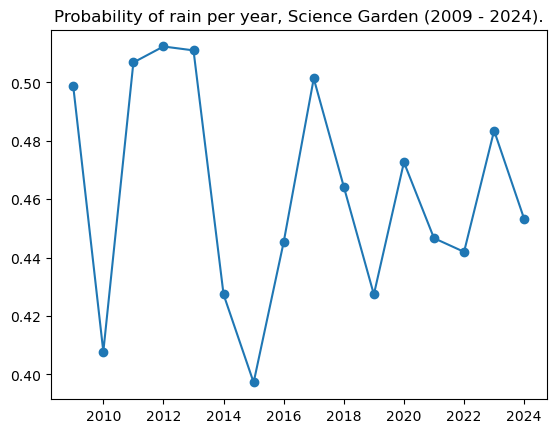

In [7]:
import matplotlib.pyplot as plt
plt.plot(rain_prob_by_year['year'], rain_prob_by_year['P_rain'] , '-o')
plt.title('Probability of rain per year, Science Garden (2009 - 2024).')
plt.show()

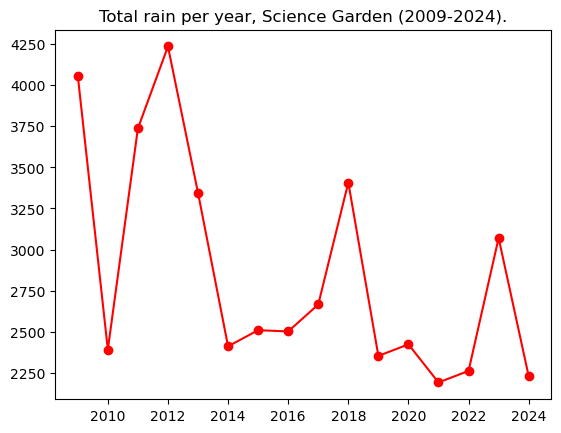

In [8]:
import matplotlib.pyplot as plt
plt.plot(rain_prob_by_year['year'], rain_prob_by_year['total_rain']  , '-ro')
plt.title('Total rain per year, Science Garden (2009-2024).')
plt.show()

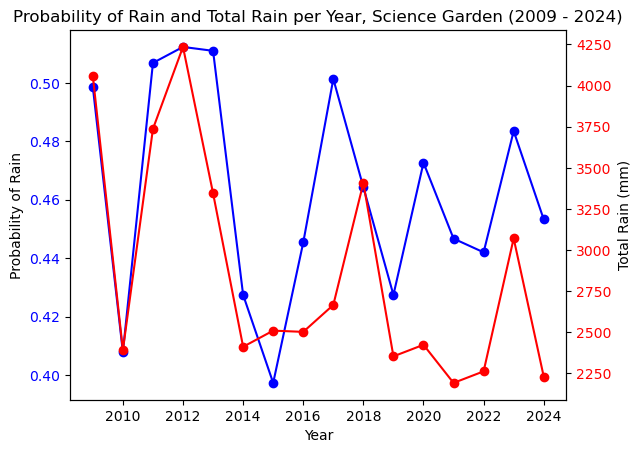

In [9]:
# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the first dataset (Probability of Rain)
ax1.plot(rain_prob_by_year['year'], rain_prob_by_year['P_rain'], '-o', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Probability of Rain')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset (Total Rain)
ax2.plot(rain_prob_by_year['year'], rain_prob_by_year['total_rain'], '-ro')
ax2.set_ylabel('Total Rain (mm)')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title
plt.title('Probability of Rain and Total Rain per Year, Science Garden (2009 - 2024)')

# Show the plot
plt.show()

In [10]:
rain_threshold = 3500
probability_threshold = 0.50 

# Find years with high total rain
high_rain_years = rain_prob_by_year[rain_prob_by_year['total_rain'] > rain_threshold]

# Find years with high probability of rain
high_prob_years = rain_prob_by_year[rain_prob_by_year['P_rain'] > probability_threshold]

# Print years with high total rain
print("Years with high total rain (more than {} mm):".format(rain_threshold))
print(high_rain_years[['year', 'total_rain']])

# Print years with high probability of rain
print("\nYears with high probability of rain (greater than {}):".format(probability_threshold))
print(high_prob_years[['year', 'P_rain']])


Years with high total rain (more than 3500 mm):
   year  total_rain
0  2009    4058.412
2  2011    3736.848
3  2012    4235.196

Years with high probability of rain (greater than 0.5):
   year    P_rain
2  2011  0.506849
3  2012  0.512329
4  2013  0.510989
8  2017  0.501370


#### Questions for Task 2
1. Between 2009 and 2010, which year had a higher chance of rain? Can you guess why? What might have influenced this?<br>
**2009 had a higher chance of rain than 2010. This is because more days have rainfal greater than 1 mm. This means that the total rain is somewhat reflective of the amount of days it has rainfall higher than 1 mm.**
2. Compare the plots of probabilities and total rainfall. What other years have high probabilities of rain? What years have high amounts of rain?<br>
**Years with relatively high probabilities (> 50%) of rain include 2011-2013, 2017. Years with relatively high amounts of rain (> 3500 mm) is 2009, 2011, and 2012.**
3. What kind of rain events might increase the total rainfall but not the frequency?<br>
**Typhoons and extreme rainfall events might increase total rainfall, but since they happen in a short time, they might not skew the frequency. That is why the probability and amount of rains don't necessarily match in the plot above.**
4. One measures **how much rain falls**, the other measures **how often it rains**. When is it useful to calculate the total amount of rain? When is it more useful to focus on the probability or frequency of rain?<br>
**The total amount of rain is more useful when looking at events lasting a few hours to a few days. The probability is more useful in climactic studies - where trends are more of the focus.**

---

### Task 3a. Probability of a Hot and Rainy Day (Joint Event)
Now that we've looked at rainy days, let’s introduce another condition: hot days.

We’ll define a hot day as any day with a maximum temperature (`MAX_C`) above a certain threshold, for example, 35°C.

P(hot ∩ rainy) = Probability that a day is both hot and rainy in 2010

In [11]:
# Focus on a single year
df_2010 = df[df['year'] == 2010].copy()

# Define hot days: MAX_C > 35
df_2010['is_hot'] = (df_2010['MAX_C'] > 35).astype(int)

# Joint event: hot AND rainy
df_2010['hot_and_rainy'] = ((df_2010['is_hot'] == 1) & (df_2010['is_rainy'] == 1)).astype(int)

# Calculate joint probability
p_hot_and_rainy = df_2010['hot_and_rainy'].mean()

print(f"Probability of a hot and rainy day in 2010: {p_hot_and_rainy:.4f}")

Probability of a hot and rainy day in 2010: 0.0307


### Task 3b. Probability of a Cool and Rainy Day (Joint Event)
In a new cell below, copy the script above and calculate the joint probability for cool (`MIN_C<25`) and rainy days. 

In [12]:
# Focus on a single year
df_2010 = df[df['year'] == 2010].copy()

# Define hot days: MAX_C > 35
df_2010['is_cold'] = (df_2010['MIN_C'] < 25).astype(int)

# Joint event: hot AND rainy
df_2010['cold_and_rainy'] = ((df_2010['is_cold'] == 1) & (df_2010['is_rainy'] == 1)).astype(int)

# Calculate joint probability
p_hot_and_rainy = df_2010['cold_and_rainy'].mean()

print(f"Probability of a cold and rainy day in 2010: {p_hot_and_rainy:.4f}")

Probability of a cold and rainy day in 2010: 0.3156


#### Questions for Task 3
1. Is the probability of a cool and rainy day higher or lower than the probability of a hot and rainy day in 2010?<br>
**There is a higher chance of a cold and rainy day than a hot and rainy day.**
2. Does this match your expectations based on your own experience of rainy weather?<br>
**No, because I would expect warmer days to have a higher chance of rain caused by more convection.**
3. What might be the typical season or weather pattern that causes cool and rainy days in the Philippines?<br>
**Cold and rainy days can be caused high wind speeds from typhoons which could lower temperature. Additionally, more rain and water over a prolonged period could cool an area. La Nina could also have been the presistent weather system, causing more rains.**
4. Why might minimum temperature be more closely linked to rain than maximum temperature?<br>
**Although max temperature could influence the occurence of rain, cold weather would more likely indicate that rain has already occured in an area. This means that it is a better proxy for analyzing rainfall events.**

In [31]:
df['is_windy'] = (df['WDSP_ms'] > 1.59).astype(int)
df['is_humid'] = (df['DEWP_C'] > 24).astype(int)
df['is_low_pres'] = (df['SLP'] < 1008).astype(int)

# Get unique years in the dataset (sorted)
years = sorted(df['year'].unique())

# Create an empty list to store results
results = []

# Loop through each year and calculate rainy day probability
for y in years:
    subset = df[df['year'] == y]
    prop_windy_days = subset['is_windy'].mean()
    prop_humid_days = subset['is_humid'].mean()
    prop_low_pres_days = subset['is_low_pres'].mean()
    # Store results in the list
    results.append({
        'year': y,
        'prop_windy_days': prop_windy_days,
        'prop_humid_days': prop_humid_days,
        'prop_low_pres_days': prop_low_pres_days
    })

# Convert the list of results to a DataFrame
weather_stats_by_year = pd.DataFrame(results)

# Show the results
weather_stats_by_year

,year,prop_windy_days,prop_humid_days,prop_low_pres_days
0,2009,0.139726,0.471233,0.312329
1,2010,0.134078,0.491620,0.189944
2,2011,0.150685,0.476712,0.254795
3,2012,0.076712,0.369863,0.260274
4,2013,0.000000,0.000000,0.000000
5,2014,0.358904,0.443836,0.189041
6,2015,0.356164,0.263014,0.139726
7,2016,0.401639,0.355191,0.161202
8,2017,0.334247,0.345205,0.147945
9,2018,0.381868,0.203297,0.236264


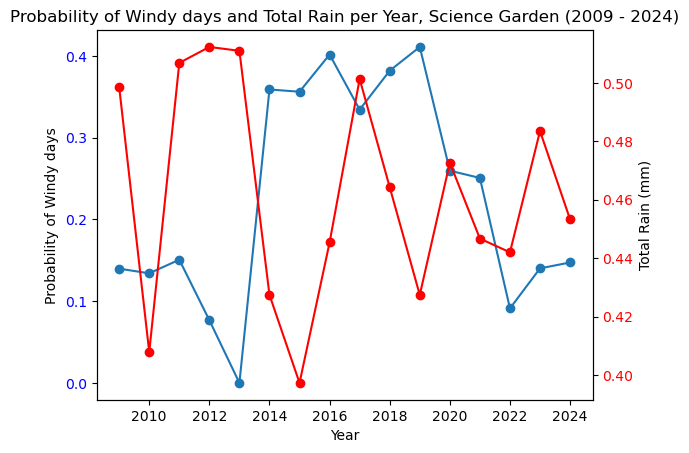

In [35]:
# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the first dataset (Probability of Rain)
ax1.plot(weather_stats_by_year['year'], weather_stats_by_year['prop_windy_days'] , '-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Probability of Windy days')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset (Total Rain)
ax2.plot(rain_prob_by_year['year'], rain_prob_by_year['P_rain'], '-ro')
ax2.set_ylabel('Total Rain (mm)')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title
plt.title('Probability of Windy days and Probability of Rain per Year, Science Garden (2009 - 2024)')

# Show the plot
plt.show()

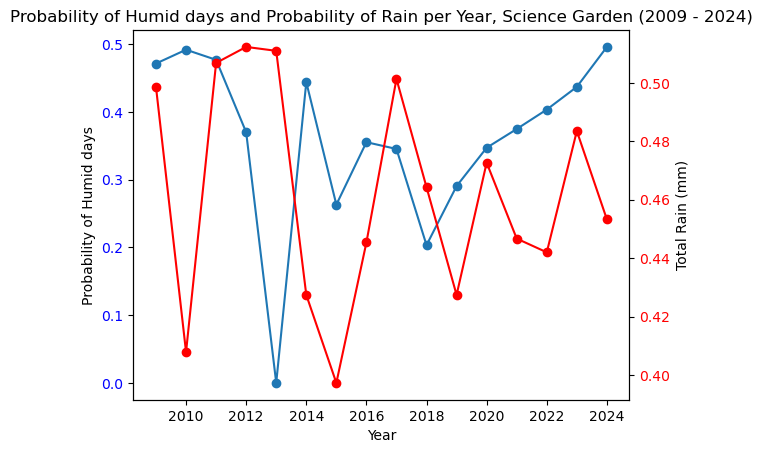

In [36]:
# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the first dataset (Probability of Rain)
ax1.plot(weather_stats_by_year['year'], weather_stats_by_year['prop_humid_days'] , '-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Probability of Humid days')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset (Total Rain)
ax2.plot(rain_prob_by_year['year'], rain_prob_by_year['P_rain'], '-ro')
ax2.set_ylabel('Total Rain (mm)')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title
plt.title('Probability of Humid days and Probability of Rain per Year, Science Garden (2009 - 2024)')

# Show the plot
plt.show()

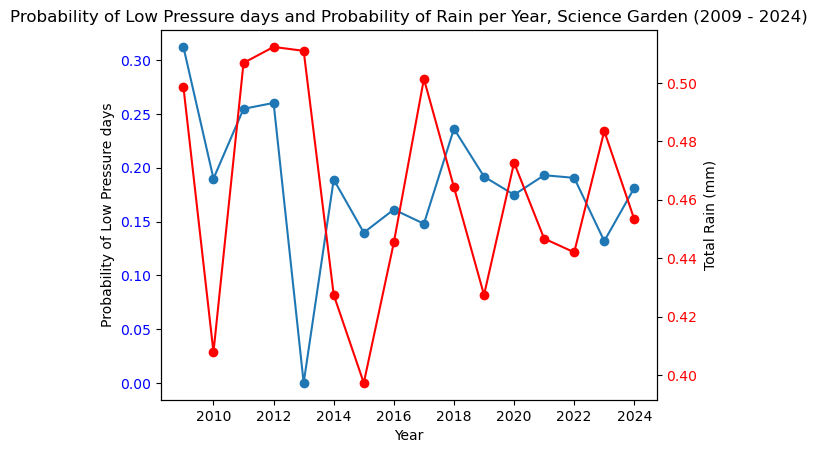

In [42]:
# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the first dataset (Probability of Rain)
ax1.plot(weather_stats_by_year['year'], weather_stats_by_year['prop_low_pres_days'] , '-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Probability of Low Pressure days')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset (Total Rain)
ax2.plot(rain_prob_by_year['year'], rain_prob_by_year['P_rain'], '-ro')
ax2.set_ylabel('Total Rain (mm)')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title
plt.title('Probability of Low Pressure days and Probability of Rain per Year, Science Garden (2009 - 2024)')

# Show the plot
plt.show()

---

### Final Questions

1. What are the advantages of using probability instead of just counting rainy or hot days?<br>
**Probability gives us a number for prediction and analysis, which is easier to interpret than just having the number of rainy/hot days.**
2. How does working with real data (versus synthetic data) change your understanding of uncertainty?<br>
**Working with real data eliminates our assumptions of what the data is supposed to behave like. This means that in prediction, there is always uncertainty brought by a multitude of factors.**
3. Which combinations of weather conditions were common? Which were rare?<br>
**Based on primitive graphs, any combination of events with low pressures are more rare. This is understandable since we are not always under a typhoon. Humid and rainy days are also a combination that seem to be more common.**
4. When is it more helpful to calculate the total amount of rain, and when is it more useful to calculate the probability of rain? (What kinds of questions can each one answer?)<br>
**The total amount of rain is useful for events, rainfall, typhoon, seasons. Pr**
5. What are some challenges or limitations you noticed when working with real data?<br>

6. If you had more time or more weather variables, what patterns would you want to explore next?<br>
